### 타이타닉 생존자 예측
데이터를 읽고 전체적인 상황 이해하기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# 데이터 읽어오기
raw_data = pd.read_csv('./titanic/train.csv')

In [5]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
raw_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# 데이터 결측치 존재 여부, 데이터 타입, 컬럼의 수
# 데이터 프레임의 메모리 사용량
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# 데이터프레임의 통계정보
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\izimi\.conda\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


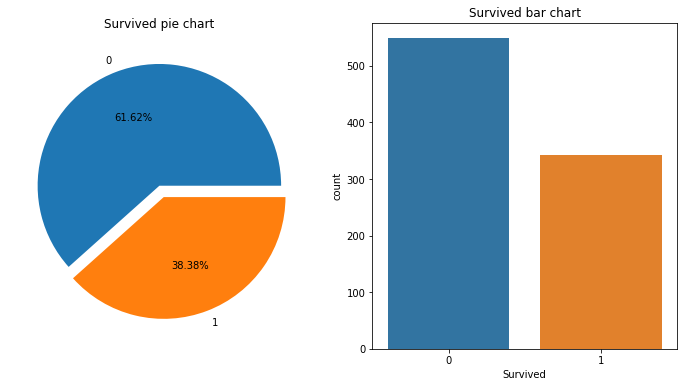

In [9]:
# 왼쪽: 원형차트, 오른쪽: 바차트
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# raw_data중 'Survived' 열 데이터만 (0과 1의 개수를 세고) 원형 그래프로 그린다. (거리는 0.1띄우고, 소수점 둘째자리까지)
raw_data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survived pie chart')
ax[0].set_ylabel('')

sns.countplot('Survived', data=raw_data)
ax[1].set_title('Survived bar chart')
plt.show()

<AxesSubplot:>

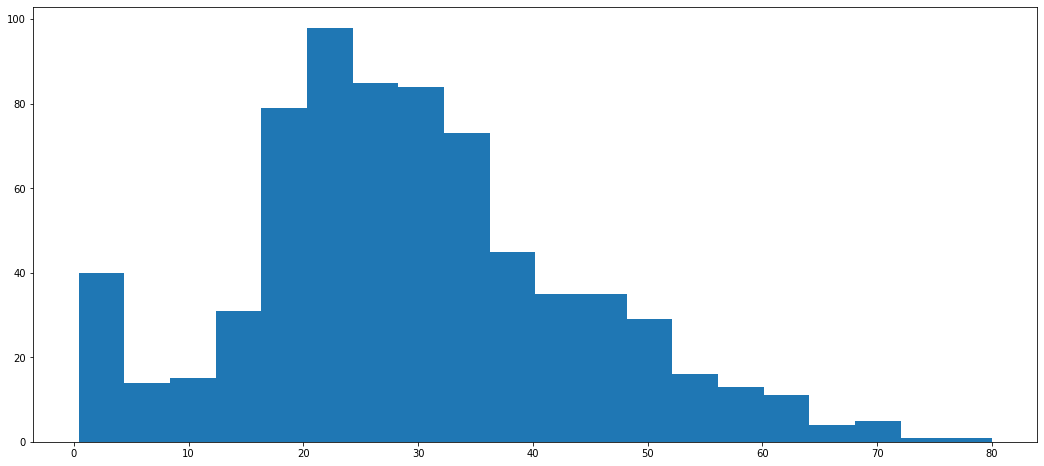

In [10]:
# 승객의 나이에 대한 분포도
# bins : 최소~최대값을 20개 구간으로 나눈다
raw_data['Age'].hist(bins=20, figsize=(18, 8), grid=False)

In [11]:
# Pclass를 기준으로 모든 열데이터 평균값 구하기
raw_data.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [12]:
# 상관계수 구하기
# Pclass와 Fare 상관도가 크다
raw_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


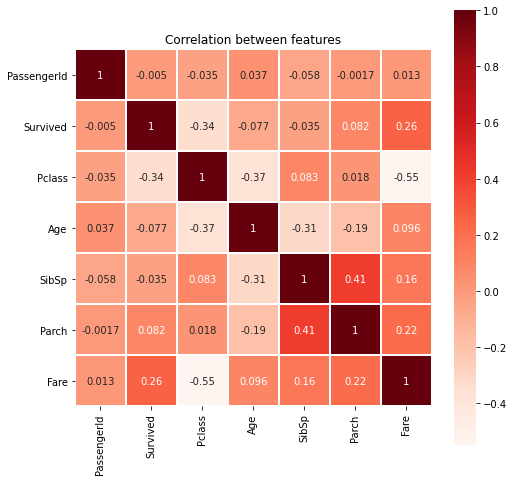

In [13]:
plt.figure(figsize=(8, 8))
sns.heatmap(raw_data.corr(), linewidth=0.01, square=True, annot=True, cmap=plt.cm.Reds, linecolor='white')
plt.title('Correlation between features')
plt.show()

### 나이별 구분 및 성별 생존율 확인하기

In [14]:
# age_cat 새로운열 생성
raw_data['Age_cat'] = pd.cut(raw_data['Age'], 
                            bins=[0, 3, 7, 15, 30, 60, 100], 
                            include_lowest=True,
                            labels=['baby', 'children', 'teenage', 'young', 'adult', 'old'])
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


In [15]:
raw_data.groupby('Age_cat').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age_cat,,,,,,,
baby,396.700000,0.666667,2.533333,1.672333,1.733333,1.366667,33.364307
children,466.700000,0.700000,2.650000,4.950000,1.750000,1.350000,27.905830
teenage,442.060606,0.454545,2.696970,11.500000,1.727273,1.121212,35.217430
young,435.058282,0.358896,2.426380,23.262270,0.355828,0.263804,28.015413
adult,470.388693,0.420495,1.954064,41.132509,0.363958,0.392226,42.429225
old,432.545455,0.227273,1.590909,66.022727,0.136364,0.272727,41.371214


C:\Users\izimi\.conda\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\izimi\.conda\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\izimi\.conda\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


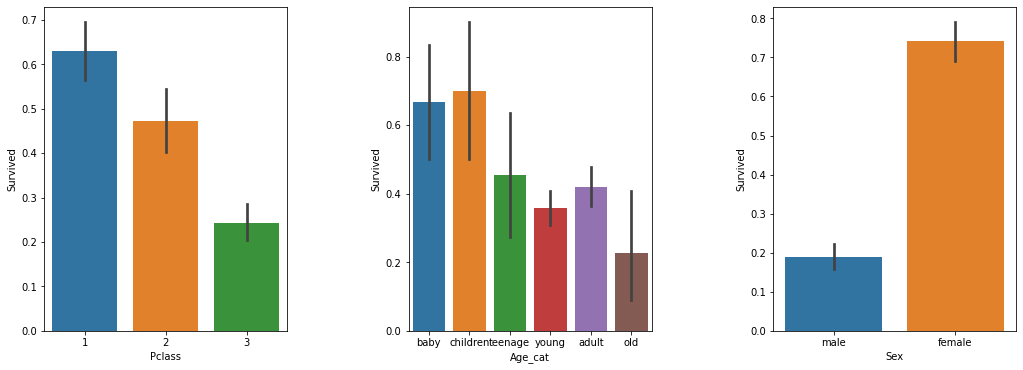

In [16]:
plt.figure(figsize=[15, 5])
plt.subplot(131)
sns.barplot('Pclass', 'Survived', data=raw_data)
plt.subplot(132)
sns.barplot('Age_cat', 'Survived', data=raw_data)
plt.subplot(133)
sns.barplot('Sex', 'Survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

C:\Users\izimi\.conda\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\izimi\.conda\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


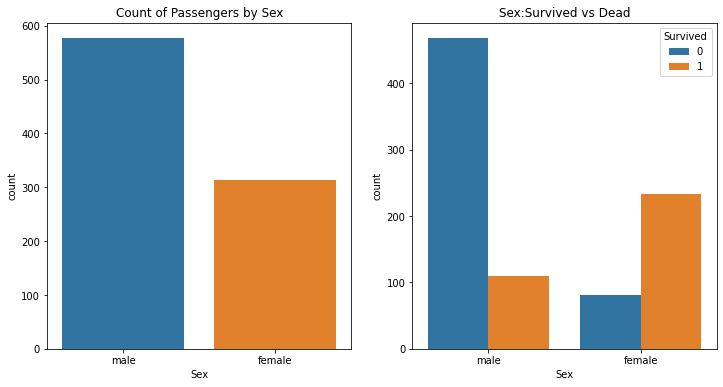

In [17]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('Sex',data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('Sex',hue='Survived',data=raw_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()


### 귀족들의 생존율만 조사를 해보자

In [18]:
raw_data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [19]:
print(raw_data['Name'][0])
print(raw_data['Name'][0].split(',')[1])
print(raw_data['Name'][0].split(',')[1].split('.')[0])
print(raw_data['Name'][0].split(',')[1].split('.')[0].strip())

Braund, Mr. Owen Harris
 Mr. Owen Harris
 Mr
Mr


In [20]:
# 이름에서 그 사람의 신분을 확인하는 문자열을 추출 -> lambda
conversion_rare = lambda x: x.split(',')[1].split('.')[0].strip()

# Name열을 입력해서 신분만 추출 -> 'Title' 이라는 열을 생성
raw_data['Title'] = raw_data['Name'].map(conversion_rare)
raw_data['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [21]:
# 'Title' 열중에 고유한 이름만 확인
raw_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [22]:
pd.crosstab(raw_data['Title'], raw_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [23]:
raw_data['Title'] = raw_data['Title'].replace('Mlle', 'Miss')
raw_data['Title'] = raw_data['Title'].replace('Ms', 'Miss')
raw_data['Title'] = raw_data['Title'].replace('Mme', 'Mrs')

raw_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Major', 'Lady',
       'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer'], dtype=object)

In [24]:
raw_data[['Title', 'Survived']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.702703
9,Mr,0.156673


In [25]:
# 귀족의 신분을 리스트로 생성
Rare = ['Lady','the Countess','Countess','Capt', 'Master',
        'Col','Don','Dr','Major','Rev','Sir','Jonkheer', 'Dona']

for each in Rare:
    raw_data['Title'] = raw_data['Title'].replace(each, 'Rare')

In [26]:
raw_data[['Title', 'Survived']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Miss,0.702703
1,Mr,0.156673
2,Mrs,0.793651
3,Rare,0.492063


### 생존율 예측을 위해 데이터를 학습
학습에 사용할 특징데이터를 선택해야한다

In [27]:
# 보다 좋은 학습을 위해 성별 'female', 'male' -> '0', '1' 로 변환해준다
tmp = []

for each in raw_data['Sex']:
    if each=='female':
        tmp.append(0)
    elif each=='male':
        tmp.append(1)
    else:
        # 예외처리코드
        tmp.append(np.nan)

In [28]:
raw_data['Sex'] = tmp
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,young,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,adult,Mr


In [29]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age_cat      714 non-null    category
 13  Title        891 non-null    object  
dtypes: category(1), float64(2), int64(6), object(5)
memory usage: 91.7+ KB


In [30]:
raw_data['Survived'] = raw_data['Survived'].astype('float')
raw_data['Pclass'] = raw_data['Pclass'].astype('float')
raw_data['Sex'] = raw_data['Sex'].astype('float')
raw_data['SibSp'] = raw_data['SibSp'].astype('float')
raw_data['Parch'] = raw_data['Parch'].astype('float')
raw_data['Fare'] = raw_data['Fare'].astype('float')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat,Title
0,1,0.0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,young,Mr
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0.0,PC 17599,71.2833,C85,C,adult,Mrs
2,3,1.0,3.0,"Heikkinen, Miss. Laina",0.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,young,Miss
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0.0,113803,53.1000,C123,S,adult,Mrs
4,5,0.0,3.0,"Allen, Mr. William Henry",1.0,35.0,0.0,0.0,373450,8.0500,NaN,S,adult,Mr


### 생존자 예측 모델 수립

In [31]:
raw_data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


In [32]:
train_pre = raw_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
train_pre.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,38.0,1.0,0.0,71.2833
2,3.0,0.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,35.0,1.0,0.0,53.1000
4,3.0,1.0,35.0,0.0,0.0,8.0500


In [33]:
train_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    float64
 1   Sex     891 non-null    float64
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    float64
 4   Parch   891 non-null    float64
 5   Fare    891 non-null    float64
dtypes: float64(6)
memory usage: 41.9 KB


In [34]:
train_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    float64
 1   Sex     891 non-null    float64
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    float64
 4   Parch   891 non-null    float64
 5   Fare    891 non-null    float64
dtypes: float64(6)
memory usage: 41.9 KB


In [36]:
# Age 결측치 채우기
meanAge = train_pre['Age'].mean()
train_pre['Age'] = train_pre['Age'].fillna(meanAge)

<ipython-input-36-d2f58d75802b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pre['Age'] = train_pre['Age'].fillna(meanAge)


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_pre, raw_data[['Survived']], test_size=0.1, random_state=123, stratify=raw_data[['Survived']])

In [41]:
temp = y_train.astype('int')
temp

,Survived
608,1
862,1
778,0
838,1
20,0
...,...
506,1
387,1
245,0
768,0


In [133]:
x_train.shape, x_test.shape

((801, 6), (90, 6))

In [124]:
x_train = x_train.reset_index(drop=True)
x_test = x_train.reset_index(drop=True)
y_train = x_train.reset_index(drop=True)
y_test = x_train.reset_index(drop=True)

In [125]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,0.0,18.000000,0.0,0.0,9.8417
1,2.0,1.0,29.699118,0.0,0.0,13.8625
2,2.0,1.0,54.000000,0.0,0.0,14.0000
3,3.0,1.0,3.000000,4.0,2.0,31.3875
4,1.0,1.0,37.000000,0.0,1.0,29.7000
...,...,...,...,...,...,...
796,2.0,0.0,34.000000,0.0,1.0,23.0000
797,2.0,0.0,30.000000,0.0,0.0,12.3500
798,3.0,1.0,32.000000,0.0,0.0,7.9250
799,3.0,1.0,30.000000,0.0,0.0,7.2500


In [126]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  801 non-null    float64
 1   Sex     801 non-null    float64
 2   Age     801 non-null    float64
 3   SibSp   801 non-null    float64
 4   Parch   801 non-null    float64
 5   Fare    801 non-null    float64
dtypes: float64(6)
memory usage: 37.7 KB


In [129]:
# 생존의 문제는 Classification
# DecisionTree
from sklearn.tree import DecisionTreeClassifier

# 1. 모델 정의
model = DecisionTreeClassifier(max_depth=3, random_state=123)

In [134]:
# 2. 모델 학습
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [73]:
# Accuracy, Recall, precision, F1 : 성능(정확도) 평가기준
from sklearn.metrics import accuracy_score

# 3. predict
prediction = model.predict(x_test)
print("Accuracy : {}%".format(accuracy_score(y_test, prediction)*100))

Accuracy : 81.11111111111111%


In [136]:
# 생존자 예측
# Pclass, Sex, Age, SibSp, Parch, Fare
dicaprio = [3., 1., 19., 0., 0., 5.]
winslet = [1., 0., 17., 1., 1., 100.]

In [137]:
model.predict_proba([dicaprio])

array([[0.87692308, 0.12307692]])

In [138]:
model.predict_proba([winslet])

array([[0.04026846, 0.95973154]])

In [139]:
def isSurvived(name, person):
    isSurvive = 'not survived' if model.predict([person])[0] == 0 else 'Survived'
    print(name, ' is ', isSurvive, 
          ' --> ', max(model.predict_proba([person])[0]))

In [140]:
isSurvived('Dicaprio', dicaprio)
isSurvived('Winslet', winslet)

Dicaprio  is  not survived  -->  0.8769230769230769
Winslet  is  Survived  -->  0.959731543624161


### Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [98]:
# 1. 모델 선언
model = LogisticRegression()

In [100]:
# 2. 모델 학습
model.fit(x_train, y_train)

C:\Users\izimi\.conda\envs\ds\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\izimi\.conda\envs\ds\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
# 3. 학습이 잘 되었는지 확인
prediction = model.predict(x_test)

In [102]:
print("Accuracy : {}%".format(accuracy_score(y_test, prediction)*100))

Accuracy : 81.11111111111111%


### SGD Classifier

In [103]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [104]:
# 1. 모델 선언
# random_state => random_seed
sgd = SGDClassifier(penalty='l1', random_state=119, n_jobs=-1)

In [105]:
# 2. 모델 학습
sgd.fit(x_train, y_train)

C:\Users\izimi\.conda\envs\ds\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDClassifier(n_jobs=-1, penalty='l1', random_state=119)

In [106]:
# 3. 학습이 잘 되었는지 확인
prediction = model.predict(x_test)

In [107]:
print("Accuracy : {}%".format(accuracy_score(y_test, prediction)*100))

Accuracy : 81.11111111111111%


### KNN

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [109]:
# 1. 모델 정의
# default k = 5
model = KNeighborsClassifier(n_neighbors=3)

In [110]:
# 2. 모델 학습
model.fit(x_train, y_train)

C:\Users\izimi\.conda\envs\ds\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [111]:
# 3. 모델 테스트
prediction = model.predict(x_test)

In [113]:
print("Accuracy : {}%".format(accuracy_score(y_test, prediction)*100))

Accuracy : 71.11111111111111%


### Random Forest
의사결정 트리의 보완방법 (가장 선호되는 방법)

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [122]:
# 1. 모델 정의
model = RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=2, random_state=120)

In [123]:
# 2. 모델 학습
model.fit(x_train, y_train)

<ipython-input-123-c694f6e747ca>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=2,
                       random_state=120)

In [124]:
# 3. 모델 테스트
prediction = model.predict(x_test)

In [125]:
print("Accuracy : {}%".format(accuracy_score(y_test, prediction)*100))

Accuracy : 81.11111111111111%
